## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [28]:
customerData = pd.read_csv('dataset\customerData_Clean.csv')

## Showing the data

In [29]:
customerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,267,18,0,1960,1,1
2184,2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,30,22,1,1940,3,1
2185,2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,297,19,1,1980,0,0
2186,2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,324,23,0,1950,1,1


### Importing Machine Learning modules

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=1)

#### Try training Income and Complain using Gradient Boosting Algorithm (Classification)

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

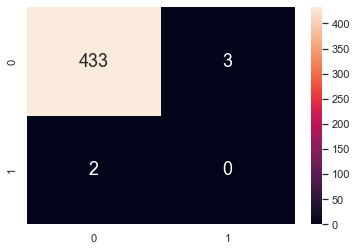

In [31]:
income = pd.DataFrame(customerData['Income'])  # Predictor
complain = pd.DataFrame(customerData['Complain'])      # Response

X_train, X_test, y_train, y_test = train_test_split(income, complain, test_size = 0.20, random_state = 1)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Try training Income and TotalPurchase using Gradient Boosting Regression (Regression)

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


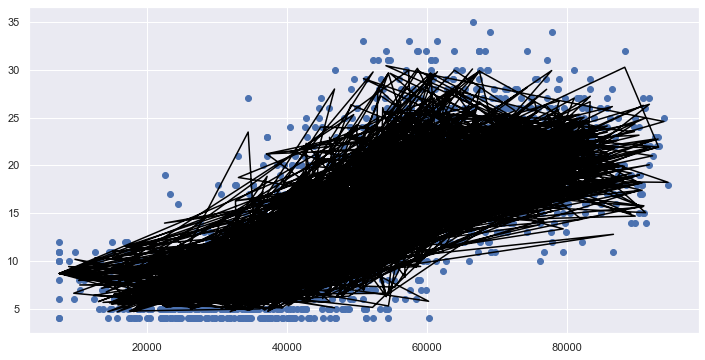

Score for the train model: 0.9419442033784713


<AxesSubplot:>

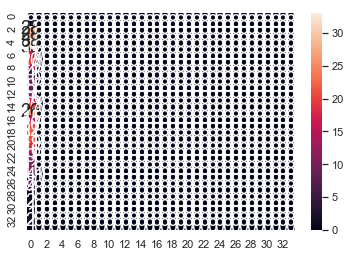

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

income = pd.DataFrame(customerData['Income'])  # Predictor
purchases = pd.DataFrame(customerData['TotalPurchase'])      # Response

X_train, X_test, y_train, y_test = train_test_split(income, purchases, test_size = 0.20, random_state = 1)

gbr = GradientBoostingRegressor(max_depth=12)
gbr.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train.to_numpy(), gbr.predict(X_train), color = 'black')
plt.show()

print("Score for the train model:", gbr.score(X_train, y_train))


y_pred = gbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


## Poisson Regression

### Predicting TotalPurchase

In [34]:
df_train = pd.read_csv(r'dataset\new_train_data.csv')
df_test =  pd.read_csv(r'dataset\new_test_data.csv')

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1083
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3409.2
Date:                Mon, 18 Apr 2022   Deviance:                       2012.3
Time:                        22:01:13   Pearson chi2:                 2.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8777
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

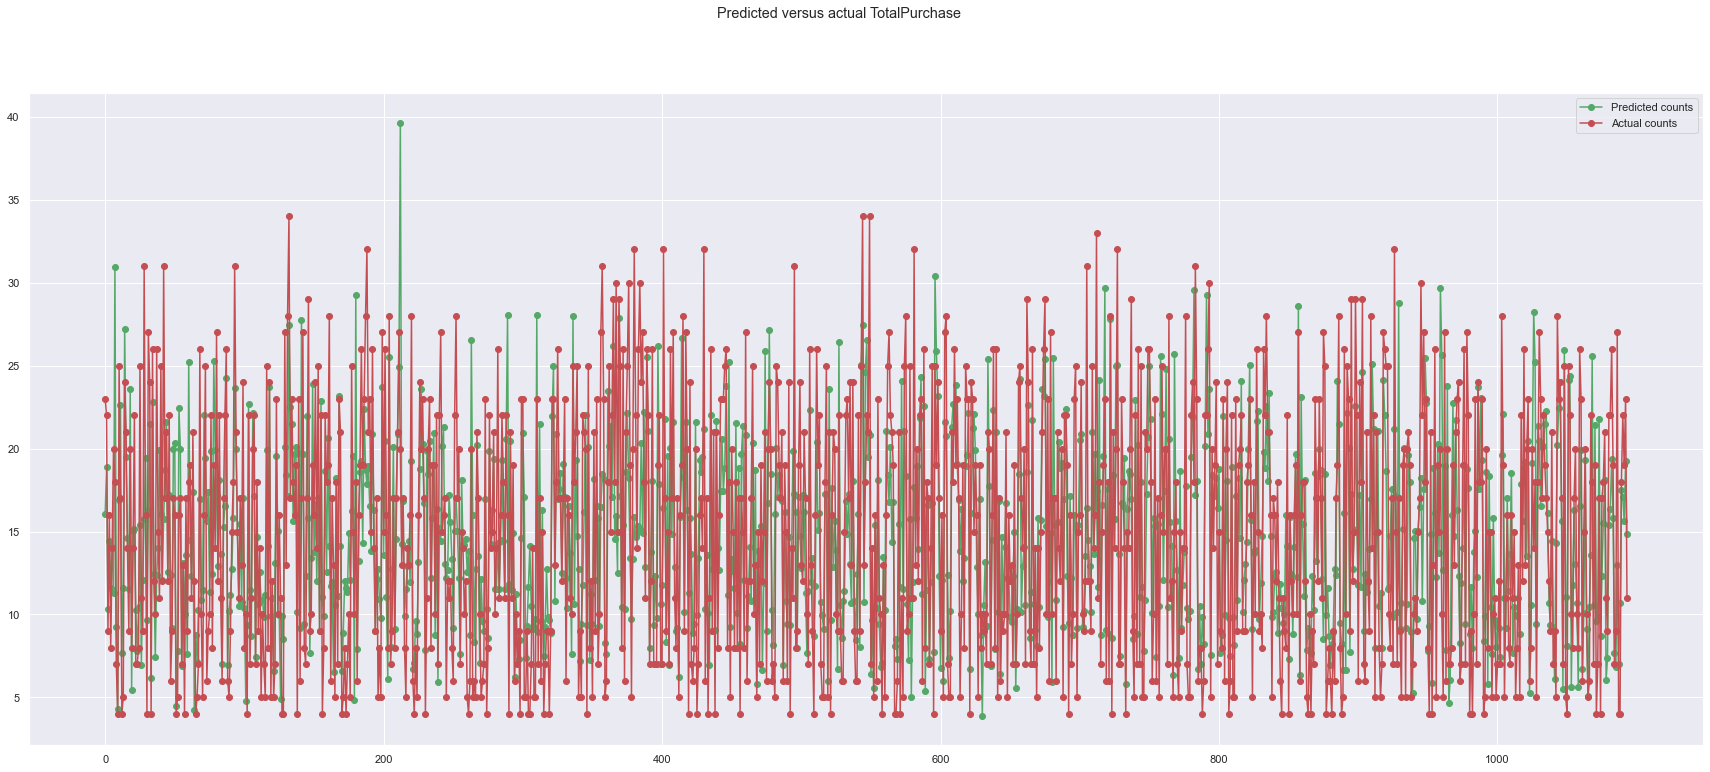

In [61]:
from patsy import dmatrices
import statsmodels.api as sm

# mask = np.random.rand(len(customerData)) < 0.8
# TotalPurchase ~ Year_Birth + Education + Marital_Status + Kidhome + Teenhome + Income + Recency + YearRange + HaveChild + Complain
# TotalPurchase ~ Income  + TotalChild + Teenhome + Kidhome + Year_Birth + Marital_Status
expr = """TotalPurchase ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual TotalPurchase')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

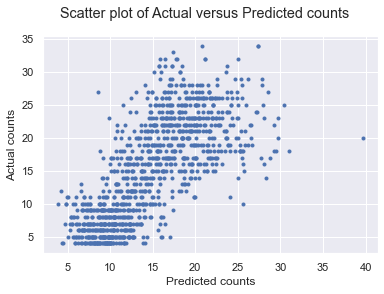

Mean Squared Error (MSE) 	: 27.460567077646246


In [62]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

#### The importance of the Income variable: removing Income

In [76]:
expr = """TotalPurchase ~ Education + Marital_Status + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1083
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4172.7
Date:                Mon, 18 Apr 2022   Deviance:                       3539.4
Time:                        22:24:52   Pearson chi2:                 3.55e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5062
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

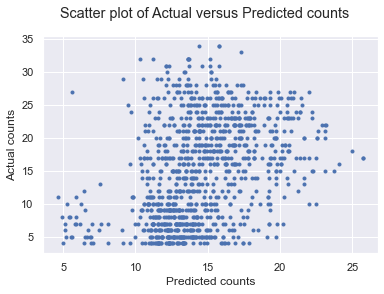

Mean Squared Error (MSE) 	: 51.27880006660447


In [67]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

#### The worse predicting variable: removing Education

In [74]:
expr = """TotalPurchase ~ Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1086
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3402.5
Date:                Mon, 18 Apr 2022   Deviance:                       1999.0
Time:                        22:04:24   Pearson chi2:                 1.99e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8792
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

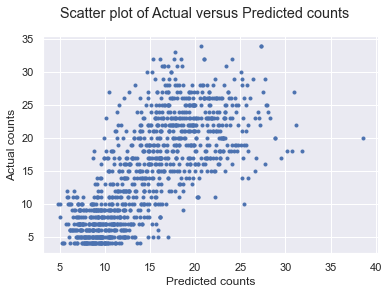

Mean Squared Error (MSE) 	: 27.014867539567593


In [75]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

### 2. Predicting MntGroceryProducts

                 Generalized Linear Model Regression Results                  
Dep. Variable:     MntGroceryProducts   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1082
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44416.
Date:                Mon, 18 Apr 2022   Deviance:                       81902.
Time:                        22:33:38   Pearson chi2:                 8.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

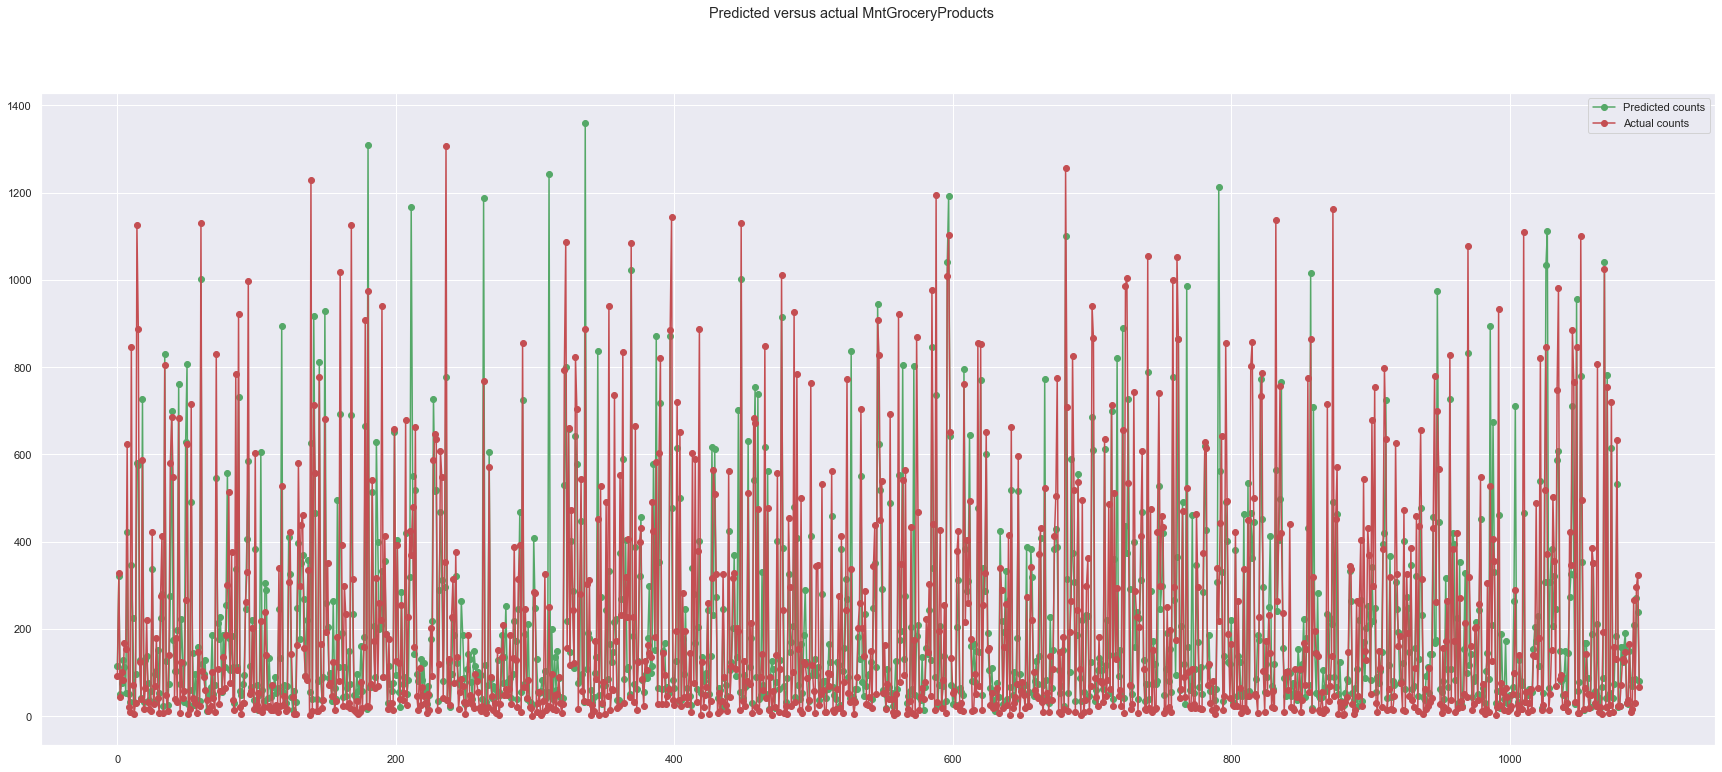

In [77]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntGroceryProducts ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGroceryProducts']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntGroceryProducts')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

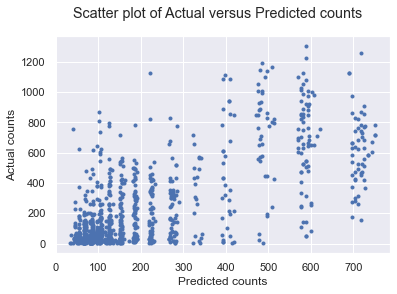

Mean Squared Error (MSE) 	: 38562.75630646424


In [91]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

#### The worse predicting variable: (All variables except Income perform somewhat equally well)

In [108]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntGroceryProducts ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth """

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGroceryProducts']

                 Generalized Linear Model Regression Results                  
Dep. Variable:     MntGroceryProducts   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1083
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44429.
Date:                Mon, 18 Apr 2022   Deviance:                       81928.
Time:                        22:44:01   Pearson chi2:                 8.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

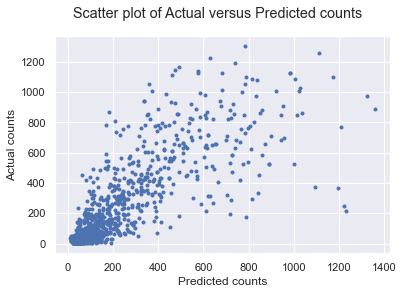

Mean Squared Error (MSE) 	: 26222.634342663794


In [109]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

### 3. Predicting MntWines

                 Generalized Linear Model Regression Results                  
Dep. Variable:               MntWines   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1082
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65265.
Date:                Mon, 18 Apr 2022   Deviance:                   1.2345e+05
Time:                        22:59:13   Pearson chi2:                 1.27e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

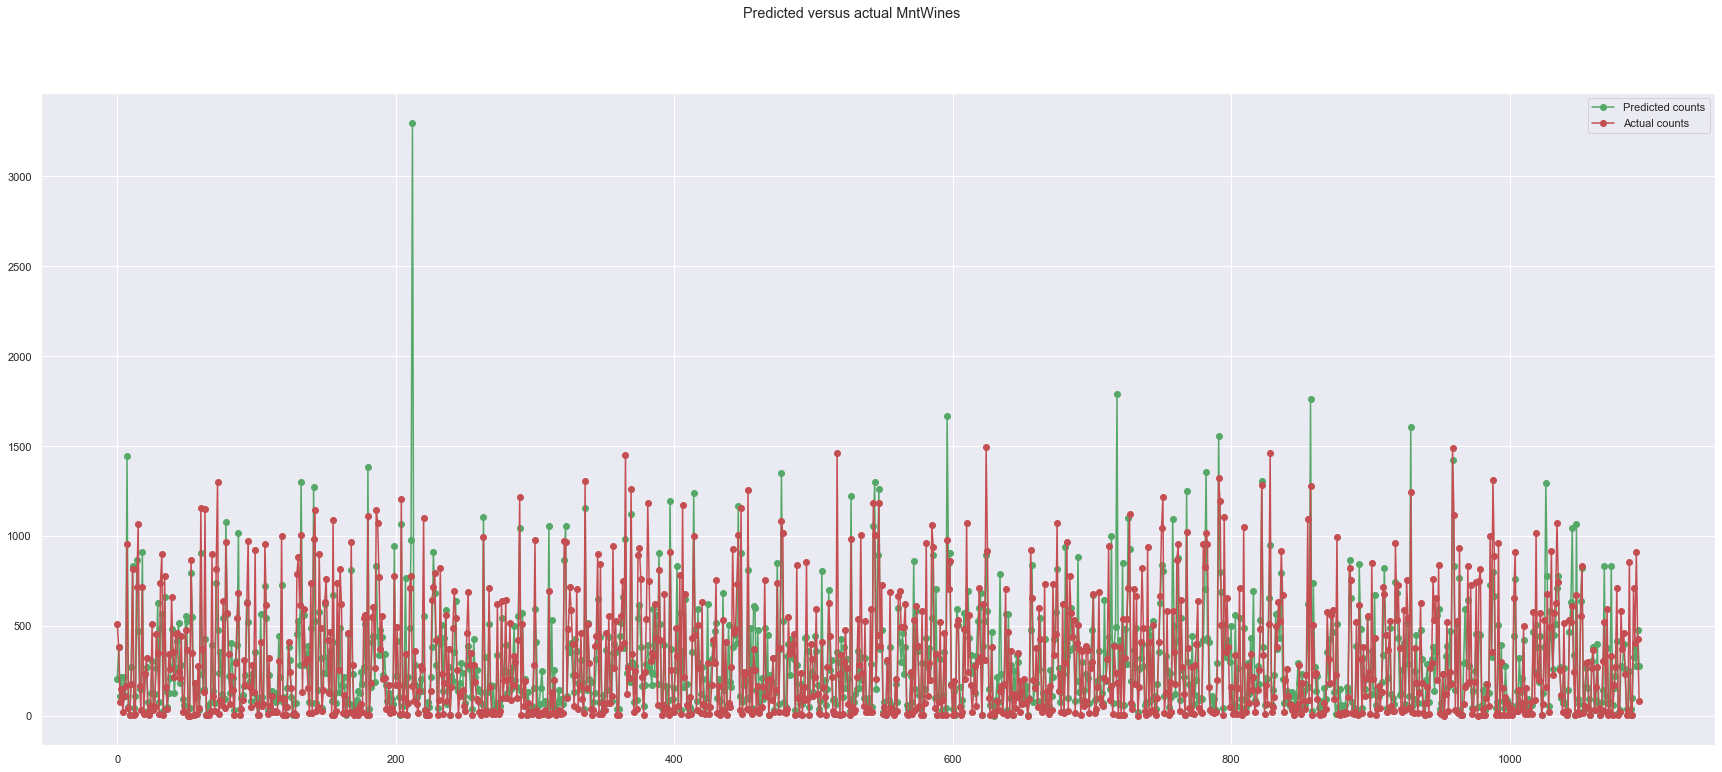

In [110]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntWines ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntWines']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntWines')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

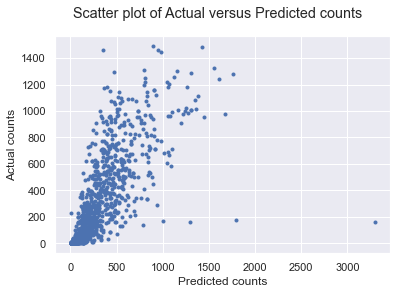

Mean Squared Error (MSE) 	: 51235.6775372484


In [111]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

#### The worse predicting variable: Education, Marital_Status, HaveChild (not a lot tho)

In [127]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntWines ~ Income + TotalChild + NumWebVisitsMonth """

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntWines']

                 Generalized Linear Model Regression Results                  
Dep. Variable:               MntWines   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1090
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73018.
Date:                Mon, 18 Apr 2022   Deviance:                   1.3896e+05
Time:                        23:10:19   Pearson chi2:                 1.41e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6257      0.01

<Figure size 432x288 with 0 Axes>

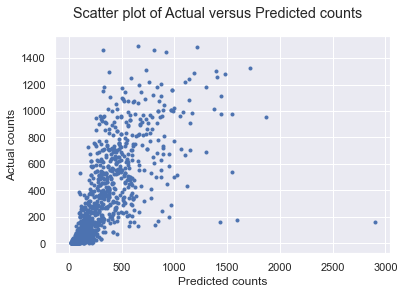

Mean Squared Error (MSE) 	: 53737.12108069529


In [128]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

### Predicting MntGoldProds

                 Generalized Linear Model Regression Results                  
Dep. Variable:           MntGoldProds   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1082
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22143.
Date:                Mon, 18 Apr 2022   Deviance:                       39013.
Time:                        23:27:14   Pearson chi2:                 4.54e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

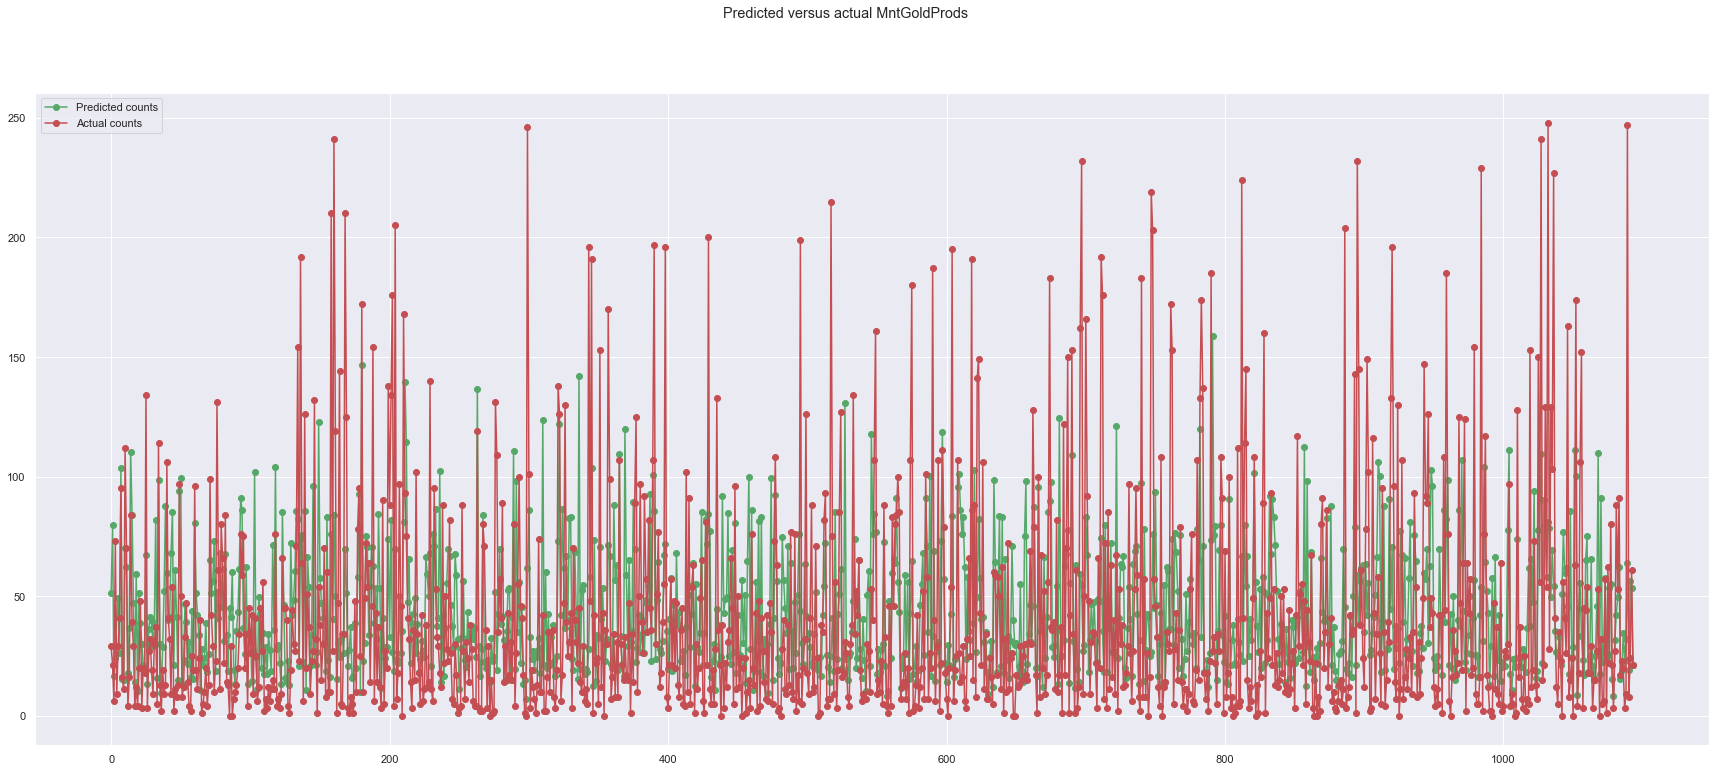

In [129]:
expr = """MntGoldProds ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGoldProds']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntGoldProds')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

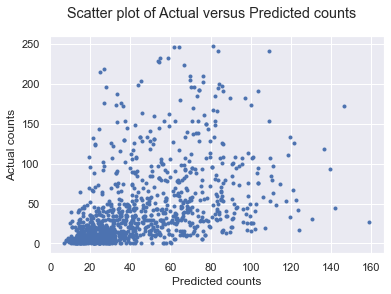

Mean Squared Error (MSE) 	: 1840.1625582084728


In [130]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))

#### The worse predicting variable: Marital_Status, HaveChild, YearRange (not very significant tho)

In [148]:
expr = """MntGoldProds ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGoldProds']


                 Generalized Linear Model Regression Results                  
Dep. Variable:           MntGoldProds   No. Observations:                 1094
Model:                            GLM   Df Residuals:                     1082
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22143.
Date:                Mon, 18 Apr 2022   Deviance:                       39013.
Time:                        23:39:52   Pearson chi2:                 4.54e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

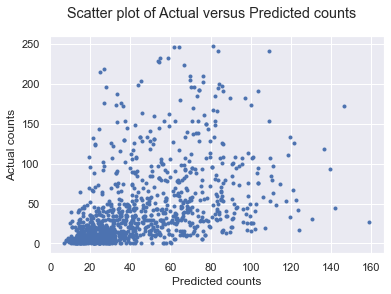

Mean Squared Error (MSE) 	: 1840.1625582084728


In [149]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))